## Multivariate Analysis

It involves the observation and analysis of more than one statistical outcome variable at a time. In simple terms, it deals with the analysis of more than one variable to understand the effect and relationship between them.

## Multivariate analysis is used for:

* Understanding Relationships: It helps in understanding the relationships between different variables in the dataset.
* Pattern Recognition: It identifies patterns and structures in data which are not apparent in univariate or bivariate analysis.
* Predictive Modeling: It is used in predictive modeling to predict the outcome of one variable based on multiple other variables.
* Dimensionality Reduction: Techniques like PCA (Principal Component Analysis) are used to reduce the dimensionality of the data while retaining as much variance as possible.

## Features of Multivariate Analysis:

* Correlation Matrix: Shows the correlation coefficients between pairs of variables.
* Scatter Plot Matrix: A grid of scatter plots that show relationships between pairs of variables.
* Heatmap: Visual representation of the correlation matrix.
* Principal Component Analysis (PCA): Reduces the dimensionality of the data while retaining most of the variance.
* Pair Plot: Pairwise relationships in a dataset.

In [1]:
# install imp. libraries
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker


In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Load the data
file_path = 'processed_loan_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-36995  Frederica Shealy      F   56       1933.05              Low   
1     C-23855  Nathalie Olivier      M   43       2361.56              Low   
2     C-24944    Barbie Goetsch      M   18       1546.17              Low   
3     C-40801      Laree Staton      M   18       2416.86              Low   
4     C-30073        Brinda Vaz      F   48        777.25              Low   

      Profession Type of Employment    Location  Loan Amount Request (USD)  \
0        Working        Sales staff  Semi-Urban                   72809.58   
1        Working           Laborers  Semi-Urban                  152561.34   
2        Working           Laborers       Rural                   42091.29   
3  State servant         Core staff  Semi-Urban                   25765.72   
4        Working           Laborers  Semi-Urban                   96080.60   

   ...  Credit Score No. of Def

In [4]:
#  Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [5]:
# Correlation Matrix
correlation_matrix = data[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                  Age  Income (USD)  \
Age                          1.000000     -0.026527   
Income (USD)                -0.026527      1.000000   
Loan Amount Request (USD)    0.003691      0.240544   
Current Loan Expenses (USD) -0.007977      0.319590   
Dependents                  -0.056981     -0.033185   
Credit Score                 0.084496      0.021051   
No. of Defaults                   NaN           NaN   
Property ID                 -0.012239     -0.014644   
Property Age                -0.026711      0.993999   
Property Type               -0.001978     -0.004515   
Co-Applicant                      NaN           NaN   
Property Price               0.004209      0.224053   
Loan Sanction Amount (USD)   0.006529      0.176932   

                             Loan Amount Request (USD)  \
Age                                           0.003691   
Income (USD)                                  0.240544   
Loan Amount Request (USD)         

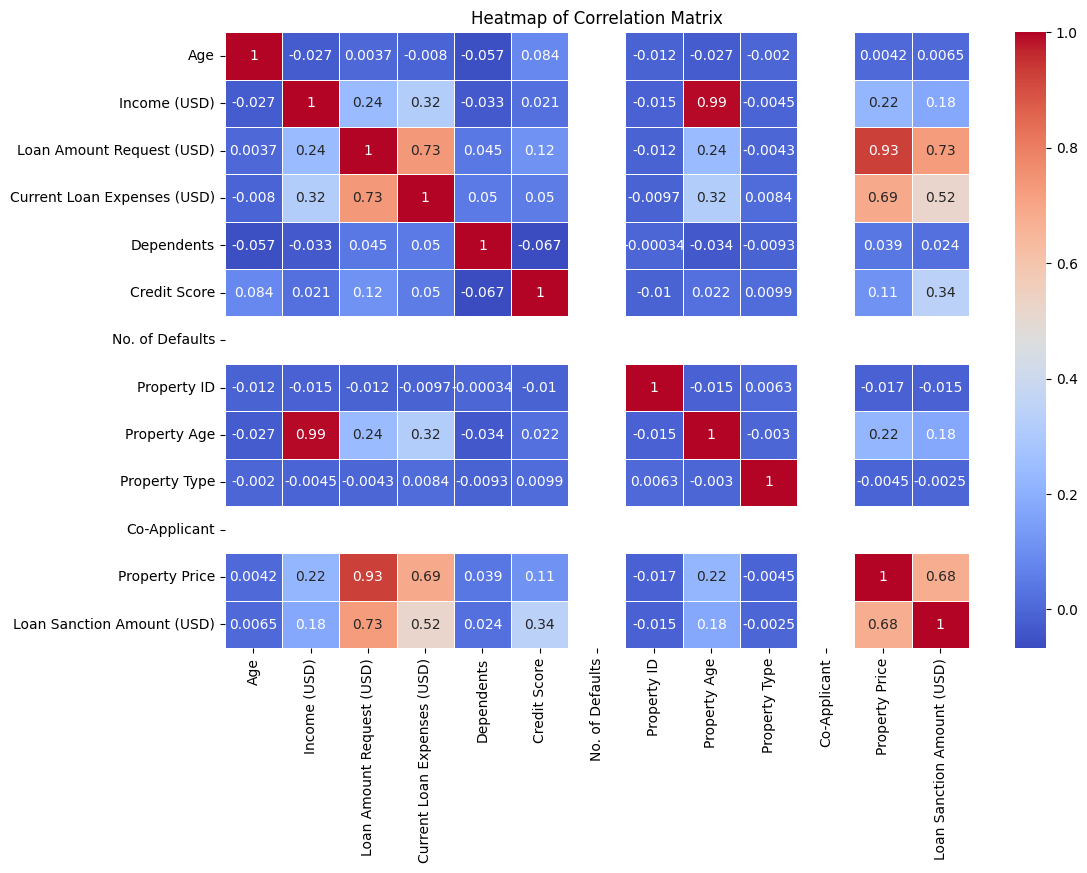

In [6]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

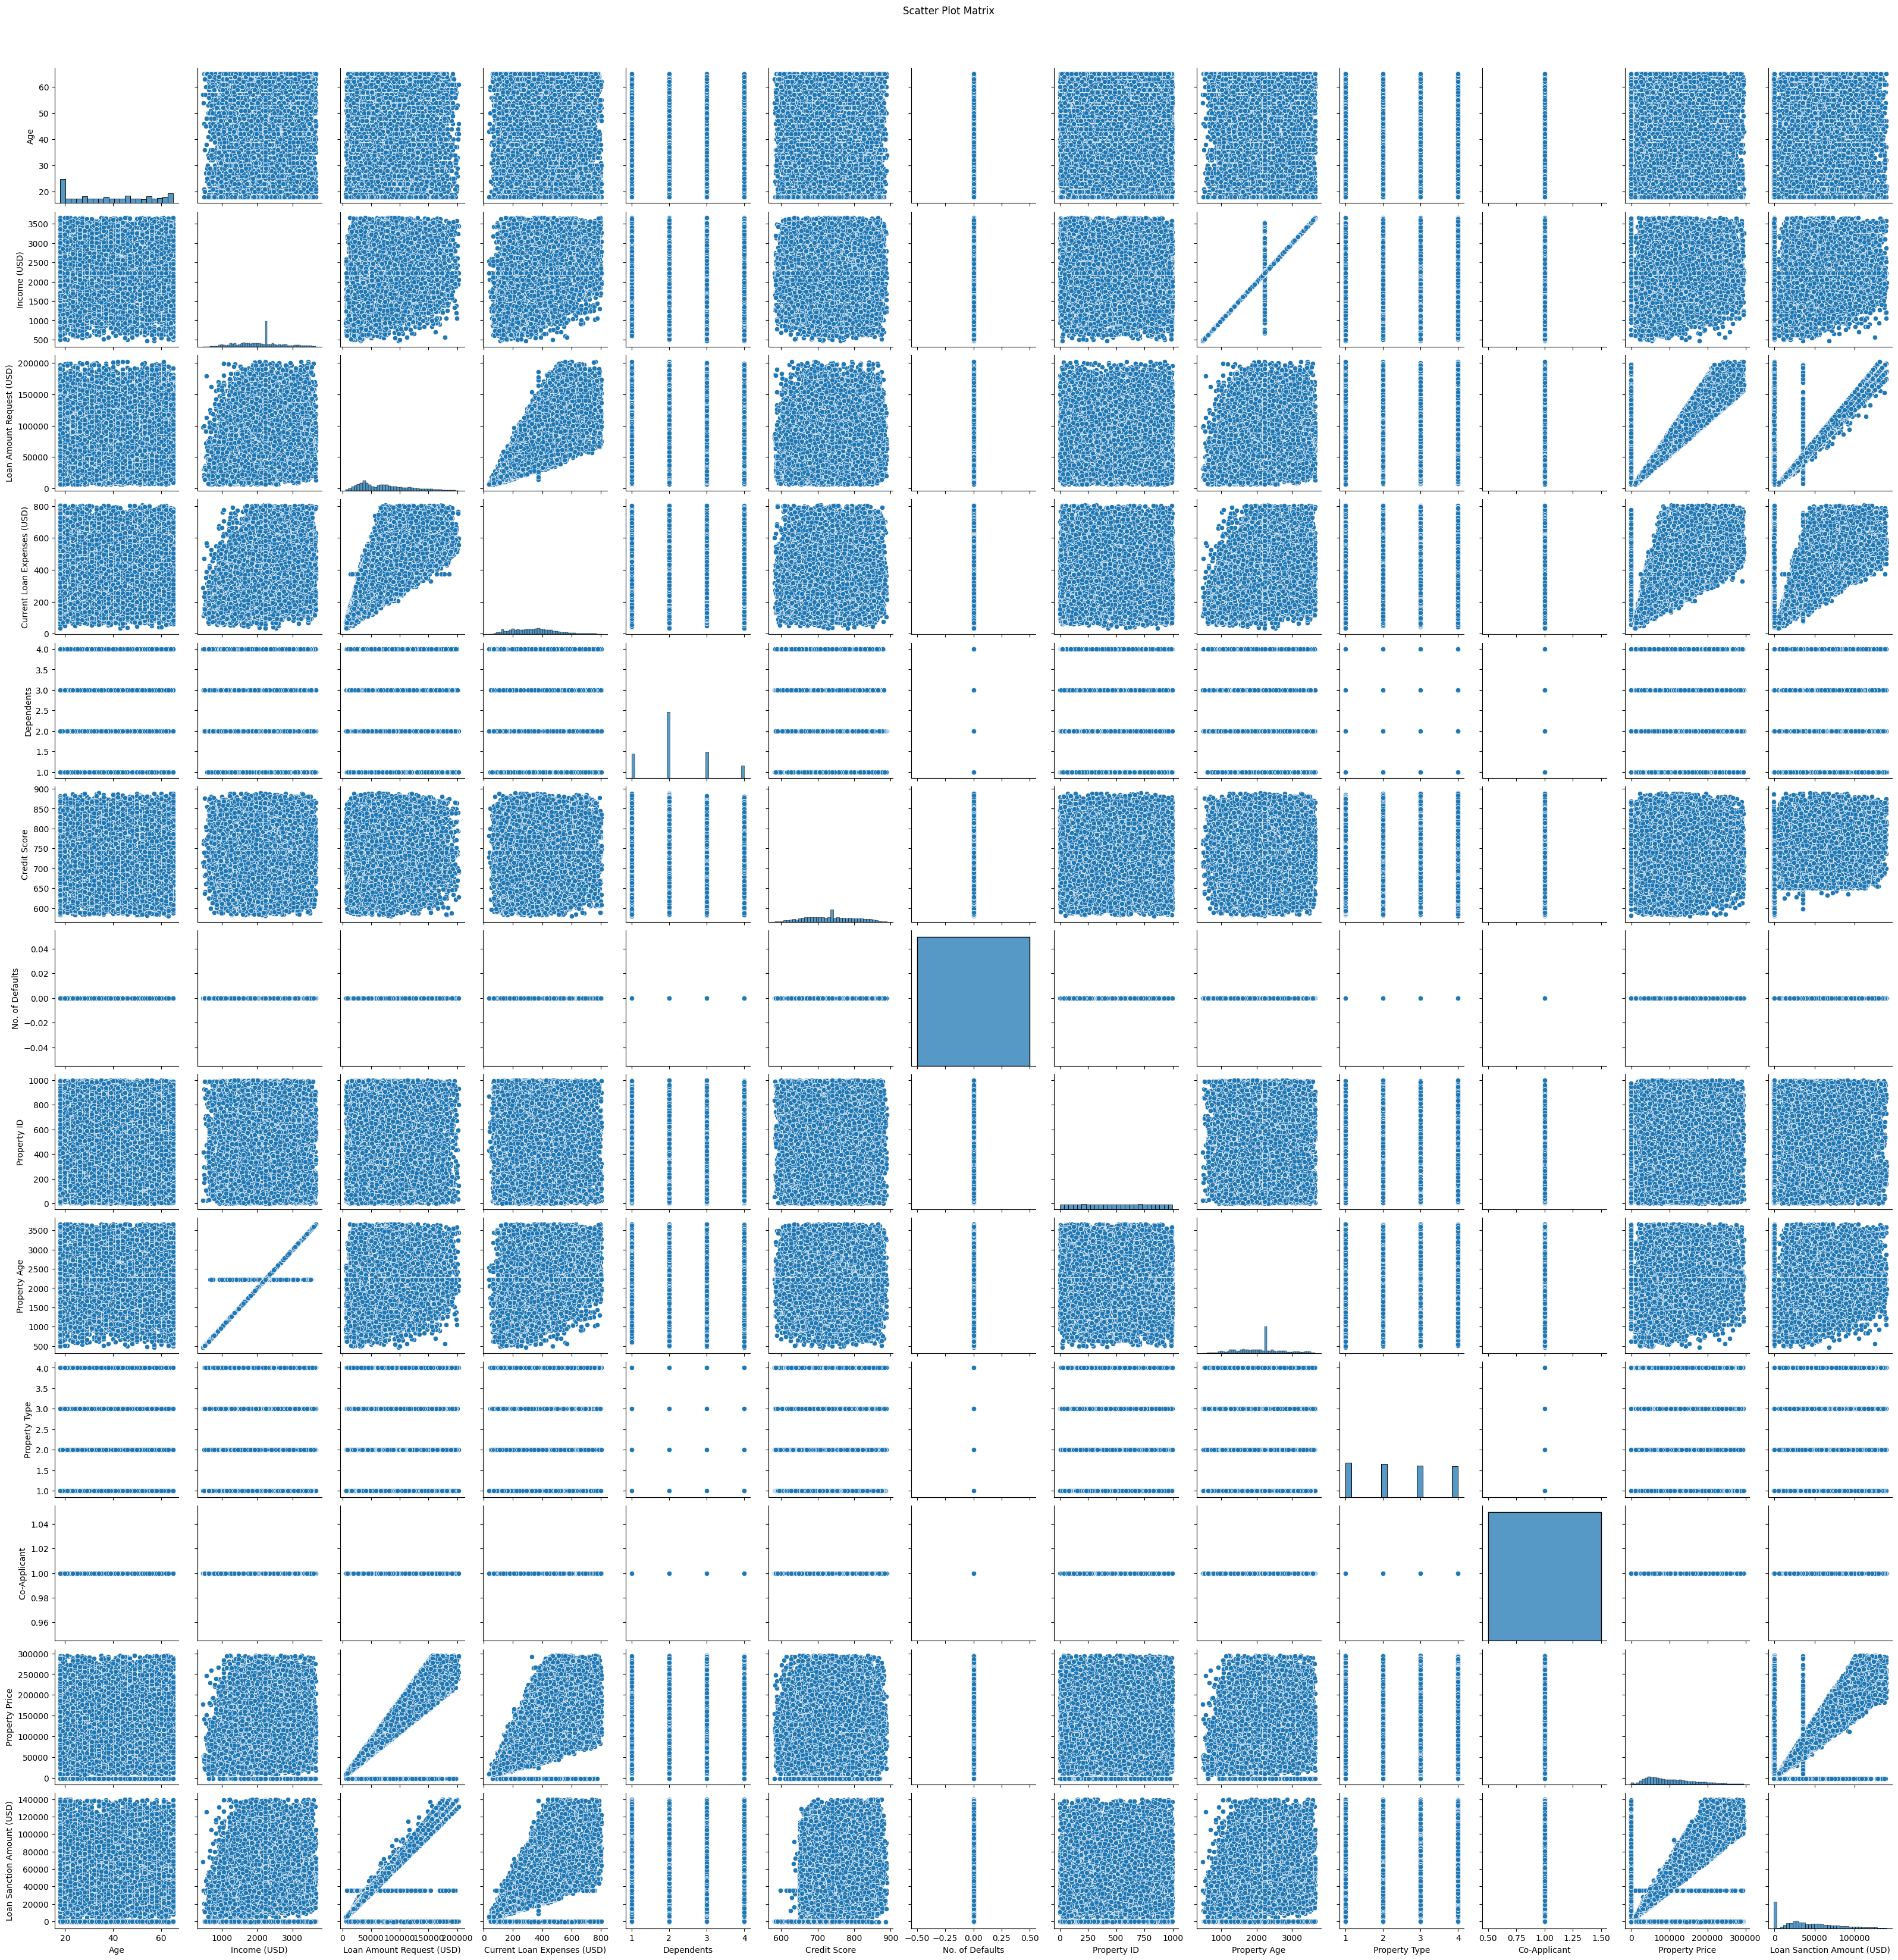

In [7]:
# Scatter Plot Matrix (Pair Plot)
sns.pairplot(data[numerical_columns])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [8]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(data[numerical_columns].dropna())
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])


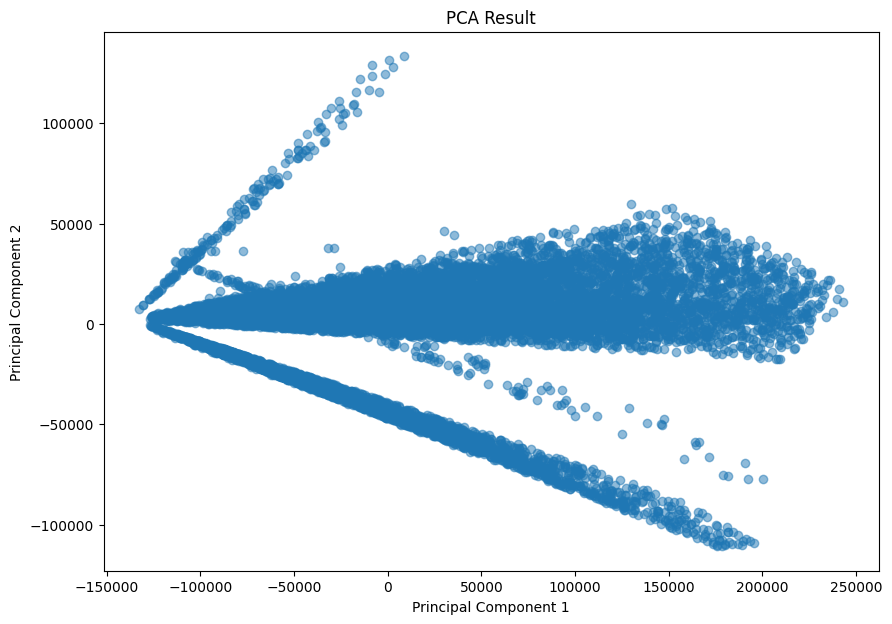

In [9]:
# Scatter Plot of PCA Result
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()